In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import os
import random
import scipy
import matplotlib.pyplot as plt
import scvelo as scv



In [3]:
subsets = glob.glob('../../labelled/*subset*') ##find the subsets of the data generated using r


In [4]:
def take_random_subset(df,samples = 100, seed = 0):
    random.seed(seed)
    if samples > df.shape[0]:
        samples = df.shape[0]
    return(df.iloc[random.sample(range(df.shape[0]), samples),:])

In [5]:
df_list = [] ##list of dataframes to which the rest will be appended
atribs_list = []
for subset in subsets: ## loop over the subesets of the data
    df = (pd.read_csv(subset,index_col=0)).T
    #print(subset)
    atribs = subset.split('.')[-2].split('_')[-2:]
    atribs_list.append(atribs) # every entry on the list must have condition and then cell type
    df["condition"] =  atribs[0]
    df["cell_type"] =  atribs[1]

    df_list.append(df)

df_concat = pd.concat(df_list)




In [23]:
rand_subset_w = take_random_subset(df = df_concat[(df_concat['cell_type'] == 'IP') & (df_concat['condition'] == 'Wildtype')],samples = 100, seed = 0)
rand_subset_m = take_random_subset(df = df_concat[(df_concat['cell_type'] == 'IP') & (df_concat['condition'] == 'Mutant')],samples = 100, seed = 0)

df_concat_ip_rand = pd.concat([rand_subset_m,rand_subset_w])


In [42]:
rand_subset_list = []
for atrib in atribs_list:
    rand_subset_list.append(take_random_subset(df = df_concat[(df_concat['cell_type'] == atrib[1]) & (df_concat['condition'] == atrib[0])],samples = 40, seed = 0))


<AxesSubplot: xlabel='cell_type', ylabel='PAX6'>

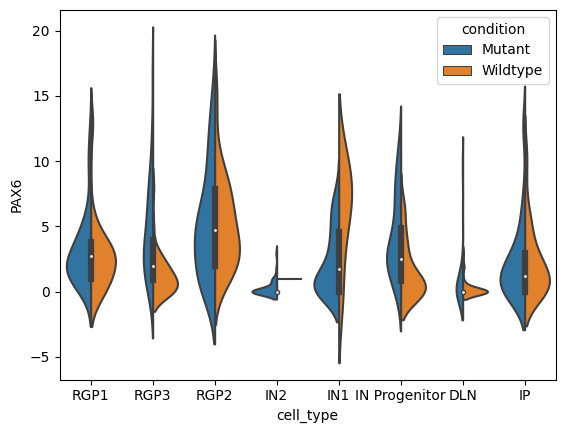

In [43]:

sns.violinplot(data = pd.concat(rand_subset_list), x = 'cell_type', y = 'PAX6' ,hue = 'condition',kind = 'violin',split=True)



/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 85.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 93.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 90.0% of the points

/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 91.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 91.2% of the points

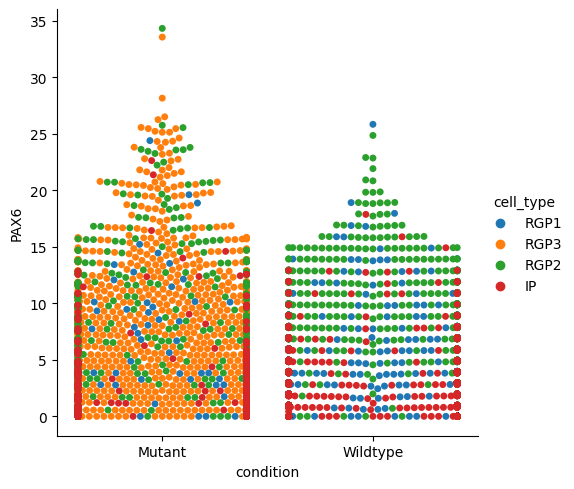

In [50]:
sns.catplot(data = df_concat, x = 'cell_type', y = 'PAX6' ,hue = 'condition',kind = 'swarm')


In [54]:
(df_concat[(df_concat['cell_type'] == 'IN Progenitor') & (df_concat['condition'] == 'Wildtype')]).corrwith(df_concat[(df_concat['cell_type'] == 'IN Progenitor') & (df_concat['condition'] == 'Mutant')],axis = 1)

/var/folders/5x/y5wv_9xn73sgkmjg4x4c3r3h0000gn/T/ipykernel_16815/2781747122.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df_concat[(df_concat['cell_type'] == 'IN Progenitor') & (df_concat['condition'] == 'Wildtype')]).corrwith(df_concat[(df_concat['cell_type'] == 'IN Progenitor') & (df_concat['condition'] == 'Mutant')],axis = 1)


AAACCCAAGCCATTGT-12   NaN
AAACCCAAGGCTCACC-16   NaN
AAACCCAGTAACAGTA-12   NaN
AAACCCAGTTGCATCA-16   NaN
AAACCCATCACCTTAT-15   NaN
                       ..
TTTGTTGCAGAAGTTA-3    NaN
TTTGTTGGTAACCCTA-16   NaN
TTTGTTGGTAACTTCG-12   NaN
TTTGTTGGTCGAAGCA-15   NaN
TTTGTTGGTTTCCAAG-16   NaN
Length: 7433, dtype: float64

In [56]:
dataframes = {}
joined_atribs = ['_'.join(inner_list) for inner_list in atribs_list]
for name_i, name in enumerate(joined_atribs):
    dataframes[name] = df_list[name_i]

In [76]:
(dataframes['Wildtype_RGP1']).drop(['cell_type','condition'],axis = 1).values.shape

(6707, 30553)

In [92]:
np.corrcoef(x = np.average((dataframes['Mutant_DLN']).drop(['cell_type','condition'],axis = 1).values,axis = 0), y = (dataframes['Mutant_RGP1']).drop(['cell_type','condition'],axis = 1).values).shape

(1052, 1052)

In [105]:
corr = scipy.signal.correlate((dataframes['Mutant_DLN']).drop(['cell_type','condition'],axis = 1).values,(dataframes['Mutant_RGP1']).drop(['cell_type','condition'],axis = 1).values)

In [163]:
mutant_cells_DLN = (dataframes['Mutant_DLN']).drop(['cell_type','condition'],axis = 1).values
mutant_cells_RGP1 = (dataframes['Mutant_RGP1']).drop(['cell_type','condition'],axis = 1).values
mutant_cells_comb = np.vstack([mutant_cells_RGP1,mutant_cells_DLN])
corr_mutant_RGP1 = np.corrcoef(mutant_cells_comb)

distance = np.linalg.norm(mutant_cells_comb)

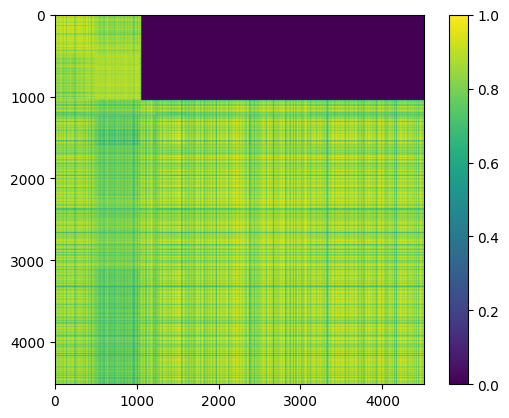

In [156]:
corr_mutant_RGP1_copy = corr_mutant_RGP1
corr_mutant_RGP1_copy[:RPG_amopunt,RPG_amopunt:] = 0

plt.imshow(corr_mutant_RGP1)
plt.colorbar()
plt.show()


In [135]:
mutant_cells_comb.shape

(4515, 30553)

In [138]:
RPG_amopunt = mutant_cells_RGP1.shape[0]
DLN_amopunt = mutant_cells_DLN.shape[0]

(array([4.80000e+01, 2.00000e+02, 5.37000e+02, 6.39000e+02, 1.02000e+03,
        1.44800e+03, 1.85100e+03, 2.39100e+03, 2.35300e+03, 2.61600e+03,
        2.78400e+03, 3.13200e+03, 3.36400e+03, 3.78200e+03, 4.23200e+03,
        4.53100e+03, 4.98500e+03, 5.23700e+03, 4.90300e+03, 5.06300e+03,
        5.29000e+03, 5.40500e+03, 5.38600e+03, 5.52200e+03, 5.64500e+03,
        5.79000e+03, 5.80300e+03, 5.85100e+03, 5.88900e+03, 6.06400e+03,
        6.10300e+03, 6.12400e+03, 6.29700e+03, 6.61900e+03, 6.76700e+03,
        6.90600e+03, 7.16600e+03, 7.52700e+03, 7.81900e+03, 8.35200e+03,
        8.69100e+03, 9.18700e+03, 9.27000e+03, 9.87600e+03, 1.05480e+04,
        1.12010e+04, 1.16720e+04, 1.20720e+04, 1.23620e+04, 1.25450e+04,
        1.30600e+04, 1.38830e+04, 1.43020e+04, 1.51210e+04, 1.62020e+04,
        1.68130e+04, 1.77900e+04, 1.84530e+04, 1.97160e+04, 2.04090e+04,
        2.12090e+04, 2.24970e+04, 2.38000e+04, 2.48640e+04, 2.70320e+04,
        2.87920e+04, 3.01620e+04, 3.22700e+04, 3.36

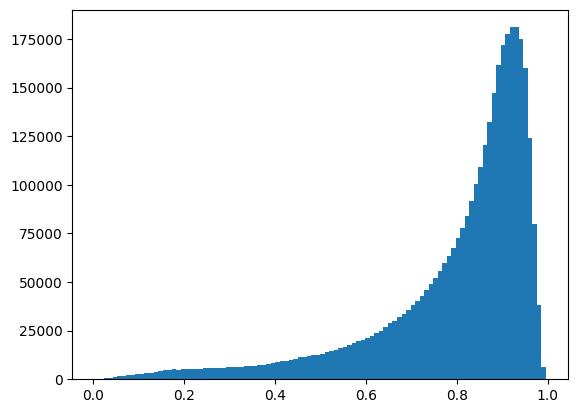

In [158]:
plt.hist(corr_mutant_RGP1[:RPG_amopunt,RPG_amopunt:].flatten(),bins = 100)

In [167]:
top_2_idx = np.argsort(corr_mutant_RGP1[:RPG_amopunt,RPG_amopunt:])[-2:]


In [169]:
top_2_idx.shape

(2, 3464)

In [170]:
corr_mutant_RGP1[:RPG_amopunt,RPG_amopunt:].shape

(1051, 3464)

In [19]:
sc_velo_loom = scv.read_loom('../../labelled/chan_combined.loom')

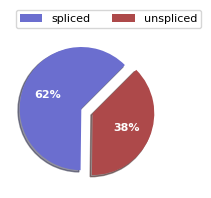

In [4]:
scv.pl.proportions(sc_velo_loom)


In [20]:
scv.pp.filter_and_normalize(sc_velo_loom, min_shared_counts=20, n_top_genes=2000)


Filtered out 40507 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


In [21]:
scv.pp.moments(sc_velo_loom, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:20) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:11) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [30]:
scv.tl.recover_dynamics(sc_velo_loom,n_jobs=-1)
#scv.tl.velocity(sc_velo_loom, n_jobs=-1,mode='stochastic')

#scv.tl.velocity_graph(sc_velo_loom, n_jobs=-1)



recovering dynamics (using 8/8 cores)


  0%|          | 0/421 [00:00<?, ?gene/s]

KeyboardInterrupt: 

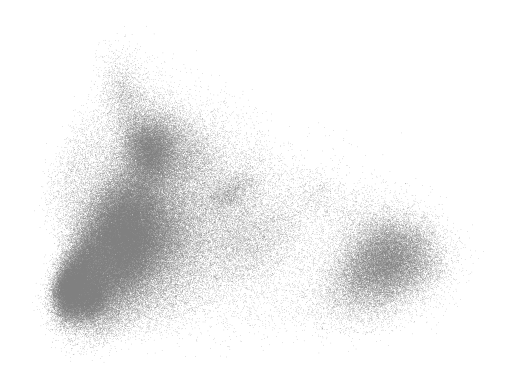

In [27]:
scv.pl.scatter(sc_velo_loom)
